In [2]:
import sklearn.datasets
X,y = sklearn.datasets.make_moons(200,noise=0.2)

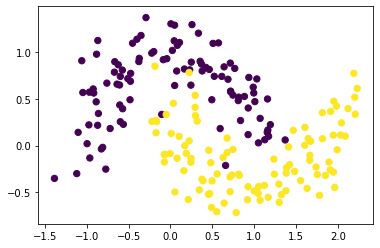

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],s=40,c=y)

In [9]:
len(y)
len(X)

200

In [11]:
import torch
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)

In [12]:
import torch.nn as nn
import torch.nn.functional as F
 
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier,self).__init__()
        self.fc1 = nn.Linear(2,3)
        self.fc2 = nn.Linear(3,2)
        
    def forward(self,x):
        x = self.fc1(x)
        x = F.tanh(x)
        x = self.fc2(x)
        return x
             
    def predict(self,x):
        pred = F.softmax(self.forward(x))
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [15]:
model = MyClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [21]:
epochs = 10
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    print(y_pred.shape,y.shape)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])
torch.Size([200, 2]) torch.Size([200])


/disk2/zk/sw/Anaconda2/envs/aliatte/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [29]:
a = torch.Tensor(3, 5)
b = torch.IntTensor(2,3)

print( a.type_as(b))
a

tensor([[          0,           0,           0,           0,           0],
        [          0,           0,           0,           0,           0],
        [-2147483648, -2147483648,           0,           0,           0]],
       dtype=torch.int32)


tensor([[-2.7363e-25,  3.0857e-41, -3.0627e-25,  3.0857e-41,  8.9683e-44],
        [ 0.0000e+00,  1.1210e-43,  0.0000e+00, -2.7331e-25,  3.0857e-41],
        [ 7.7052e+31,  7.2148e+22,  2.5226e-18,  1.6898e-04,  1.0470e-11]])